<a href="https://colab.research.google.com/github/Ramesh466-an/CITREA-INDIA-TOUR/blob/main/Research_on_CGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install torch torchvision torchaudio
!pip install pandas numpy matplotlib seaborn scipy scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.metrics import r2_score
import math
import warnings
import csv
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch import autograd
import torch.optim as optim
from torch.autograd import Variable
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
file_path = "/content/Dataset-04.csv"  # Replace with the actual file path if different
df = pd.read_csv(file_path)


In [ ]:
df.rename(columns={
    'PGA (g)': 'pga',
    'Earthquake Magnitude': 'mag',
    'Hypocenter Depth (km)': 'hypd',
    'Vs30 (m/s) selected for analysis': 'vs30',
    'EpiD (km)' : 'rjb',
}, inplace=True)


In [ ]:
df

,Record Sequence Number,EQID,mag,hypd,rjb,vs30,pga,T0.010S,T0.020S,T0.022S,...,T8.500S,T9.000S,T9.500S,T10.000S,T11.000S,T12.000S,T13.000S,T14.000S,T15.000S,T20.000S
0,1,1,6.00,6.00,6.31000,593.35,0.157020,0.157476,0.164311,0.165726,...,1.559668e-03,1.401161e-03,1.265228e-03,1.147850e-03,9.567034e-04,8.093839e-04,6.932676e-04,6.002861e-04,5.247022e-04,2.981701e-04
1,3,3,5.80,10.00,73.49000,219.31,0.040961,0.040995,0.041169,0.041347,...,2.812987e-04,2.439155e-04,2.029290e-04,1.833749e-04,1.478443e-04,1.223145e-04,1.028674e-04,8.744799e-05,7.779145e-05,4.469817e-05
2,5,5,5.50,10.00,54.88000,219.31,0.122180,0.122504,0.125593,0.122460,...,4.015383e-04,3.494375e-04,3.093273e-04,2.855526e-04,2.319197e-04,1.950382e-04,1.673502e-04,1.451080e-04,1.269837e-04,7.241705e-05
3,6,6,6.95,8.80,12.98000,213.44,0.233490,0.234202,0.233593,0.233783,...,1.541679e-02,1.229145e-02,9.599942e-03,8.637336e-03,7.999061e-03,5.428681e-03,4.559966e-03,3.596313e-03,3.119570e-03,1.921143e-03
4,11,11,5.80,10.00,55.96000,219.31,0.107090,0.107263,0.108287,0.108820,...,5.030305e-04,4.490787e-04,4.031237e-04,3.636855e-04,3.000073e-04,2.514064e-04,2.135640e-04,1.835765e-04,1.594408e-04,8.864328e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20778,19290,1258,3.80,7.59,67.05973,477.00,0.000346,0.000346,0.000351,0.000351,...,9.171827e-07,8.171007e-07,7.324252e-07,6.603838e-07,5.450142e-07,4.573504e-07,3.892752e-07,3.354014e-07,2.919816e-07,1.637305e-07
20779,19291,1258,3.80,7.59,95.77921,422.00,0.000490,0.000491,0.000495,0.000498,...,6.210341e-07,5.533513e-07,4.974943e-07,4.501383e-07,3.706488e-07,3.113651e-07,2.651208e-07,2.285204e-07,1.990135e-07,1.117173e-07
20780,19292,1258,3.80,7.59,66.54060,308.00,0.000340,0.000341,0.000341,0.000342,...,1.381319e-06,1.230308e-06,1.104111e-06,9.970856e-07,8.236188e-07,6.907071e-07,5.881421e-07,5.069992e-07,4.415622e-07,2.478865e-07
20781,19293,1258,3.80,7.59,91.03774,560.00,0.000265,0.000266,0.000266,0.000266,...,1.558062e-06,1.382752e-06,1.232256e-06,1.103414e-06,9.065308e-07,7.569266e-07,6.421688e-07,5.535721e-07,4.810272e-07,2.690367e-07


In [ ]:
df = df[(df['pga'] != -999) & (df['pga'] <= 10) & (df['mag'] >= 4)]
meta_cols = ['mag', 'rjb', 'hypd', 'vs30']
for col in meta_cols:
    df = df[df[col] != -999]
df = df[df['rjb'] <= 1000]
event_counts = df['EQID'].value_counts()
valid_eids = event_counts[event_counts >= 3].index
df = df[df['EQID'].isin(valid_eids)]

# --- Feature Engineering ---
spectral_cols = df.columns[7:]
new_names = [f"t{i}" for i in range(len(spectral_cols))]
df.rename(columns=dict(zip(spectral_cols, new_names)), inplace=True)
df['logrjb'] = np.log10(df['rjb'].replace(0, 0.01))
df['logvs30'] = np.log10(df['vs30'].astype(float).replace(0, 0.01))


KeyError: 'pga'

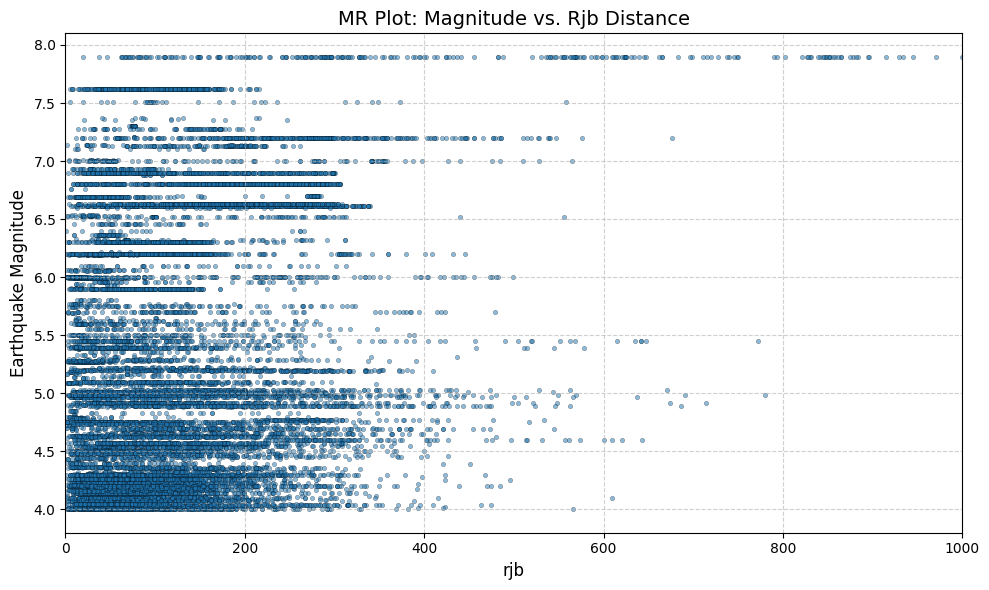

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'mag' and 'rjb' are in the DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(df['rjb'], df['mag'], s=10, alpha=0.5, edgecolors='k', linewidths=0.3)

plt.xlabel('rjb', fontsize=12)
plt.ylabel('Earthquake Magnitude', fontsize=12)
plt.title('MR Plot: Magnitude vs. Rjb Distance', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 1000)
plt.ylim(df['mag'].min() - 0.2, df['mag'].max() + 0.2)
plt.tight_layout()
plt.show()

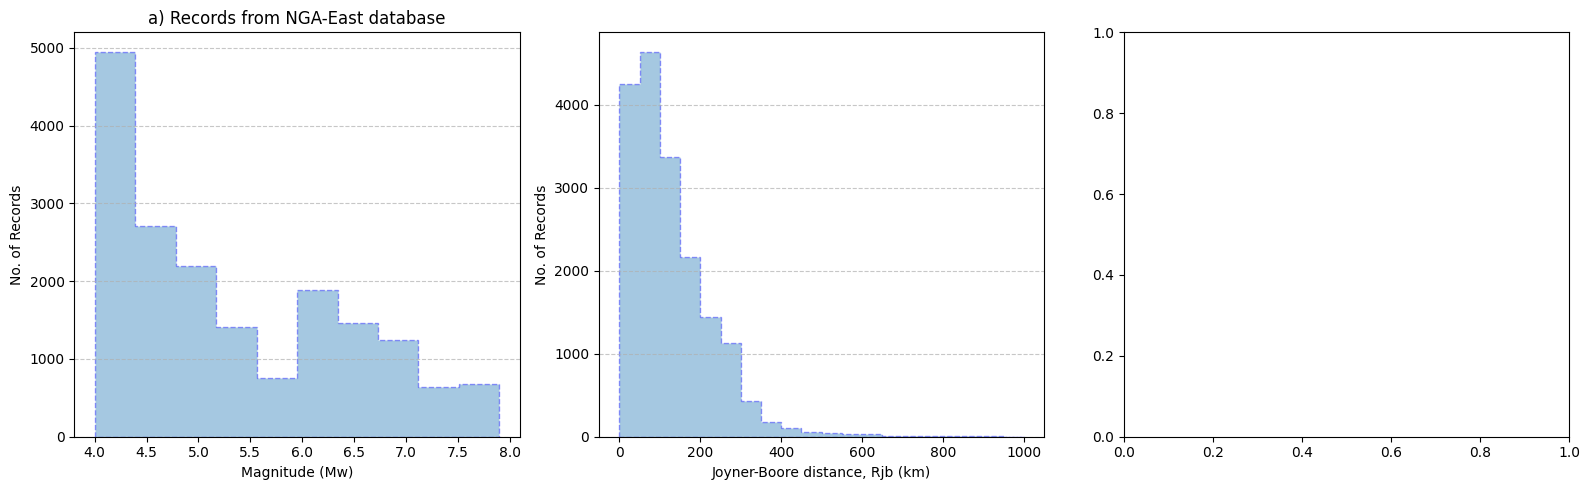

In [ ]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 3, figsize=(16, 5))

# 1. Histogram for Magnitude (mag)
axs[0].hist(df["mag"], bins=10, edgecolor='blue', linestyle='--', histtype='stepfilled', alpha=0.4)
axs[0].set_xlabel("Magnitude (Mw)")
axs[0].set_ylabel("No. of Records")
axs[0].set_title("a) Records from NGA-East database")
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Histogram for Joyner-Boore Distance (rjb)
axs[1].hist(df["rjb"], bins=20, edgecolor='blue', linestyle='--', histtype='stepfilled', alpha=0.4)
axs[1].set_xlabel("Joyner-Boore distance, Rjb (km)")
axs[1].set_ylabel("No. of Records")
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

In [ ]:
spectral_cols = df.columns[7:]
new_names = [f"t{i}" for i in range(len(spectral_cols))]
df.rename(columns=dict(zip(spectral_cols, new_names)), inplace=True)
df

,Record Sequence Number,EQID,mag,hypd,rjb,vs30,pga,t0,t1,t2,...,t101,t102,t103,t104,t105,t106,t107,t108,t109,t110
5,12,12,7.36,15.63,118.26,316.46,0.052746,0.052779,0.052883,0.052962,...,0.006126,0.004785,0.004312,0.004198,0.003416,0.002836,0.002123,0.001549,0.001212,0.000555
6,13,12,7.36,15.63,125.81,415.13,0.051003,0.051172,0.051070,0.051077,...,0.002606,0.002309,0.002203,0.001776,0.001092,0.000783,0.000623,0.000497,0.000419,0.000216
7,14,12,7.36,15.63,88.39,514.99,0.100710,0.101122,0.100790,0.100806,...,0.002780,0.002406,0.002089,0.001797,0.001442,0.001233,0.001071,0.000922,0.000794,0.000481
8,15,12,7.36,15.63,43.49,385.43,0.164500,0.164863,0.165386,0.165722,...,0.016361,0.021382,0.018379,0.012925,0.007343,0.006759,0.006222,0.004233,0.002865,0.001199
12,28,25,6.19,10.00,36.18,408.93,0.058666,0.058808,0.059889,0.060042,...,0.006433,0.005104,0.004079,0.003430,0.002748,0.002584,0.002068,0.001630,0.001353,0.000629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20748,8155,346,6.20,6.00,92.71,397.92,0.011031,0.011047,0.011214,0.011267,...,0.001219,0.001066,0.000886,0.000809,0.000616,0.000452,0.000404,0.000314,0.000244,0.000108
20749,8156,346,6.20,6.00,168.40,469.44,0.004915,0.004916,0.005027,0.005044,...,0.000511,0.000463,0.000403,0.000310,0.000262,0.000245,0.000204,0.000139,0.000107,0.000061
20750,8157,346,6.20,6.00,1.11,422.00,1.391400,1.413755,2.228769,2.050899,...,0.012876,0.011143,0.009702,0.008777,0.007543,0.006673,0.005651,0.004304,0.003358,0.001863
20751,8158,346,6.20,6.00,4.15,649.67,0.931320,0.965231,1.400829,1.685960,...,0.010465,0.008805,0.008031,0.007319,0.006095,0.005101,0.004306,0.003661,0.003143,0.001645


In [ ]:
df['logrjb'] = np.log10(df['rjb'].replace(0, 0.01))
df['logvs30'] = np.log10(df['vs30'].astype(float).replace(0, 0.01))
df

,Record Sequence Number,EQID,mag,hypd,rjb,vs30,pga,t0,t1,t2,...,t103,t104,t105,t106,t107,t108,t109,t110,logrjb,logvs30
5,12,12,7.36,15.63,118.26,316.46,0.052746,0.052779,0.052883,0.052962,...,0.004312,0.004198,0.003416,0.002836,0.002123,0.001549,0.001212,0.000555,2.072838,2.500319
6,13,12,7.36,15.63,125.81,415.13,0.051003,0.051172,0.051070,0.051077,...,0.002203,0.001776,0.001092,0.000783,0.000623,0.000497,0.000419,0.000216,2.099715,2.618184
7,14,12,7.36,15.63,88.39,514.99,0.100710,0.101122,0.100790,0.100806,...,0.002089,0.001797,0.001442,0.001233,0.001071,0.000922,0.000794,0.000481,1.946403,2.711799
8,15,12,7.36,15.63,43.49,385.43,0.164500,0.164863,0.165386,0.165722,...,0.018379,0.012925,0.007343,0.006759,0.006222,0.004233,0.002865,0.001199,1.638389,2.585946
12,28,25,6.19,10.00,36.18,408.93,0.058666,0.058808,0.059889,0.060042,...,0.004079,0.003430,0.002748,0.002584,0.002068,0.001630,0.001353,0.000629,1.558469,2.611649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20748,8155,346,6.20,6.00,92.71,397.92,0.011031,0.011047,0.011214,0.011267,...,0.000886,0.000809,0.000616,0.000452,0.000404,0.000314,0.000244,0.000108,1.967127,2.599796
20749,8156,346,6.20,6.00,168.40,469.44,0.004915,0.004916,0.005027,0.005044,...,0.000403,0.000310,0.000262,0.000245,0.000204,0.000139,0.000107,0.000061,2.226342,2.671580
20750,8157,346,6.20,6.00,1.11,422.00,1.391400,1.413755,2.228769,2.050899,...,0.009702,0.008777,0.007543,0.006673,0.005651,0.004304,0.003358,0.001863,0.045323,2.625312
20751,8158,346,6.20,6.00,4.15,649.67,0.931320,0.965231,1.400829,1.685960,...,0.008031,0.007319,0.006095,0.005101,0.004306,0.003661,0.003143,0.001645,0.618048,2.812693


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

input_cols = ['mag', 'hypd', 'rjb', 'logrjb', 'logvs30']
target_cols = [
    "t0", "t27", "t38", "t45", "t51", "t57", "t59",
    "t62", "t64","t66", "t68", "t69", "t70", "t71", "t72",
    "t73", "t74", "t75", "t76", "t77", "t78", "t79", "t80",
    "t81", "t82", "t83", "t84", "t85", "t86", "t87", "t88",
    "t89", "t90"
]


X_real = df[input_cols].copy()
for col in target_cols:
    X_real[col] = np.log10(df[col])

X_real.replace([np.inf, -np.inf], np.nan, inplace=True)
X_real.dropna(inplace=True)

X_train, X_temp = train_test_split(X_real, test_size=0.3, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

# Scale only input features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train[input_cols])

X_train_scaled = X_train.copy()
X_train_scaled[input_cols] = scaler.transform(X_train[input_cols])

X_val_scaled = X_val.copy()
X_val_scaled[input_cols] = scaler.transform(X_val[input_cols])

X_test_scaled = X_test.copy()
X_test_scaled[input_cols] = scaler.transform(X_test[input_cols])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(38, 128),
            nn.ELU(0.2),
            nn.Dropout(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x, c):
        c = c.view(c.size(0), -1)
        x = torch.cat((x, c), dim=1)
        return self.model(x.float())

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(10, 256),
            nn.ELU(0.2),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ELU(0.2),
            nn.Dropout(0.2),
            nn.Linear(128,33)
        )
    def forward(self, z, c):
        c = c.view(c.size(0), -1)
        x = torch.cat((z, c), dim=1)
        return self.model(x.float())

In [ ]:
def generate_real_samples(df_real, n):
    sample = df_real.sample(n)
    cond = torch.tensor(sample[input_cols].values, dtype=torch.float32).to(device)
    target = torch.tensor(sample[target_cols].values, dtype=torch.float32).to(device)
    return target, cond

def generate_latent_points(latent_dim, n_samples):
    return torch.randn((n_samples, latent_dim), device=device)

def generate_fake_samples(generator, latent_dim, n_samples, conditions):
    z = generate_latent_points(latent_dim, n_samples)
    conditions = torch.tensor(conditions, dtype=torch.float32).to(device)
    return generator(z, conditions), conditions

def predict(conditions_test, generator):
    generator.eval()
    with torch.no_grad():
        z = torch.randn((conditions_test.shape[0], 5), device=device)  # Create latent points based on conditions_test size
        c = torch.tensor(conditions_test, dtype=torch.float32).to(device)
        preds = generator(z, c)

        # Instead of concatenating with X_test_scaled, use conditions_test
        input_values = torch.tensor(conditions_test, dtype=torch.float32).to(device)
        preds = torch.cat((input_values, preds), dim=1).cpu().numpy()
        return preds

In [ ]:
def train(g_model, d_model, data, val_data, latent_dim=5, n_epochs=400, n_batch=128, best_r2=-1e6):
    batch_per_epoch = max(1, len(data) // n_batch)
    half_batch = n_batch // 2

    y_real = torch.ones((half_batch, 1), device=device)
    y_fake = torch.zeros((half_batch, 1), device=device)

    for epoch in range(n_epochs):
        for _ in range(batch_per_epoch):
            real_X, real_c = generate_real_samples(data, half_batch)
            fake_X, fake_c = generate_fake_samples(g_model, latent_dim, half_batch, real_c.cpu().numpy())

            d_model.zero_grad()
            loss_real = criterion(d_model(real_X, real_c), y_real)
            loss_fake = criterion(d_model(fake_X.detach(), fake_c), y_fake)
            d_loss = loss_real + loss_fake
            d_loss.backward()
            dis_optimizer.step()

            g_model.zero_grad()
            g_loss = criterion(d_model(fake_X, fake_c), y_real)
            g_loss.backward()
            gen_optimizer.step()

        if epoch % 100 == 0:
            conditions_val = val_data[input_cols].to_numpy()
            preds = predict(conditions_val, g_model)
            true_vals = val_data[input_cols + target_cols].to_numpy()
            preds = preds  # Already scaled + log-transformed

            curr_r2 = r2_score(true_vals[:, len(input_cols):], preds[:, len(input_cols):])
            print(f"Epoch {epoch}: R2 = {curr_r2:.4f}, Best R2 = {best_r2:.4f}")

            if curr_r2 > best_r2:
                torch.save(g_model.state_dict(), 'best_generator.pth')
                torch.save(d_model.state_dict(), 'best_discriminator.pth')
                best_r2 = curr_r2

            with open('results.csv', 'a', newline='') as f:
                writer = csv.writer(f)
                writer.writerow([epoch, best_r2, curr_r2, d_loss.item(), g_loss.item()])

In [ ]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)
criterion = nn.BCELoss()

gen_optimizer = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.5, 0.999))
dis_optimizer = optim.Adam(discriminator.parameters(), lr=5e-4, betas=(0.5, 0.999))

train(generator, discriminator, X_train_scaled, X_val_scaled)

Epoch 0: R2 = -3.0836, Best R2 = -1000000.0000
Epoch 100: R2 = 0.7550, Best R2 = -3.0836
Epoch 200: R2 = 0.7579, Best R2 = 0.7550
Epoch 300: R2 = 0.7493, Best R2 = 0.7579


In [ ]:
generator.load_state_dict(torch.load('best_generator.pth'))
discriminator.load_state_dict(torch.load('best_discriminator.pth'))

conditions_test = X_test_scaled[input_cols].to_numpy()
true_values = X_test_scaled[input_cols + target_cols].to_numpy()

outputs = []
for _ in range(1000):
    out = predict(conditions_test, generator)
    outputs.append(out)

mean_output = np.mean(outputs, axis=0)

r_squared_test = r2_score(true_values[:, len(input_cols):], mean_output[:, len(input_cols):])
print("Final R² on test set (PSa only):", r_squared_test)

Final R² on test set (PSa only): 0.8365388162609506


R² (full) = 0.8579608389900547
Final R² on test set (PSa only): 0.8364397540258728


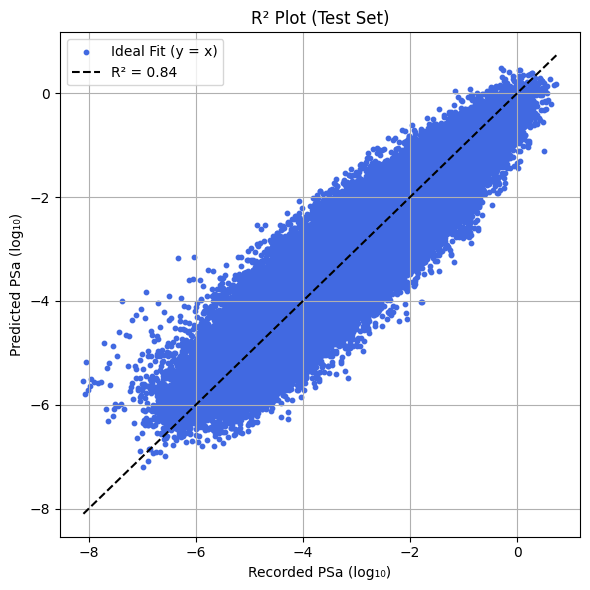

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Compute R² on test set (only PSa columns)
true_values = X_test_scaled[input_cols + target_cols].to_numpy()
conditions_test = X_test_scaled[input_cols].to_numpy()

# Generate 1000 stochastic predictions
outputs = [predict(conditions_test, generator) for _ in range(1000)]
mean_array = np.mean(outputs, axis=0)

# R² before slicing
r_squared_test = r2_score(true_values, mean_array)
print("R² (full) =", r_squared_test)

# Slice only PSa part
true_values = true_values[:, len(input_cols):]
mean_array = mean_array[:, len(input_cols):]

# R² for PSa only
r_squared_test = r2_score(true_values, mean_array)
print("Final R² on test set (PSa only):", r_squared_test)

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(true_values, mean_array, color='royalblue', s=10, label='Ideal Fit (y = x)')
min_val = min(np.min(true_values), np.min(mean_array))
max_val = max(np.max(true_values), np.max(mean_array))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label=f'R² = {r_squared_test:.2f}')
plt.title('R² Plot (Test Set)')
plt.xlabel('Recorded PSa (log₁₀)')
plt.ylabel('Predicted PSa (log₁₀)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

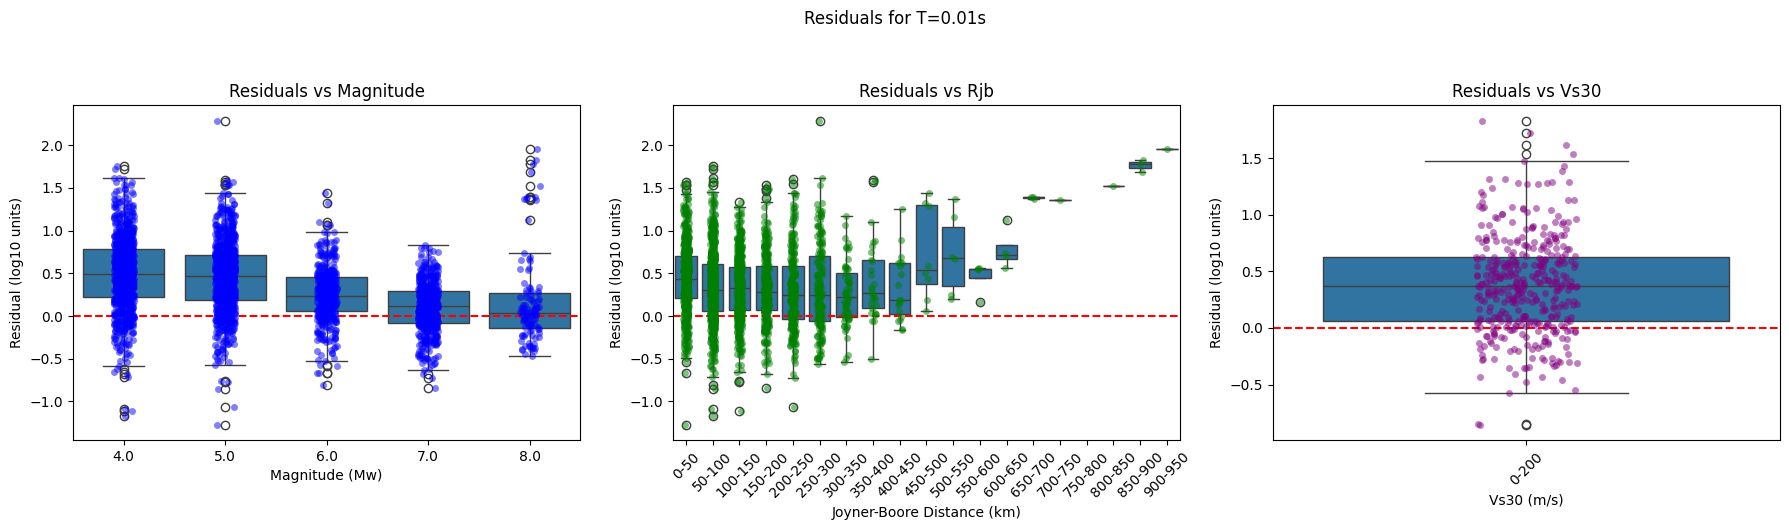

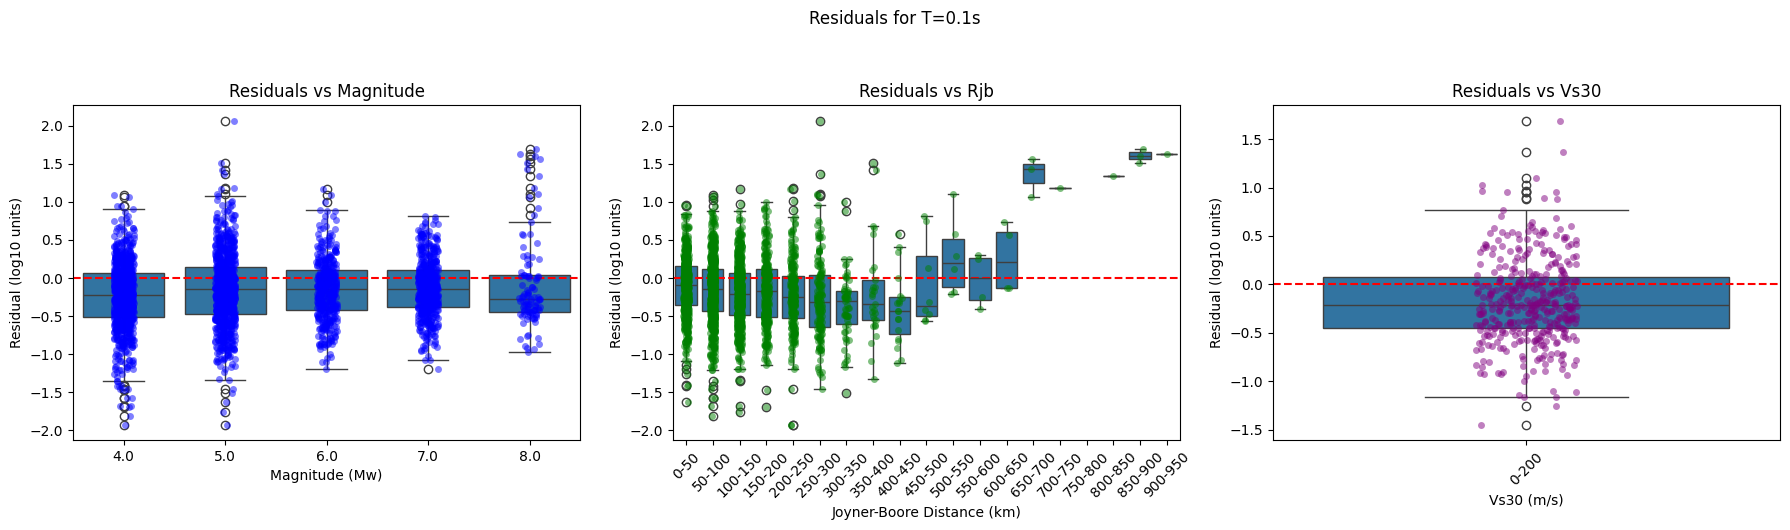

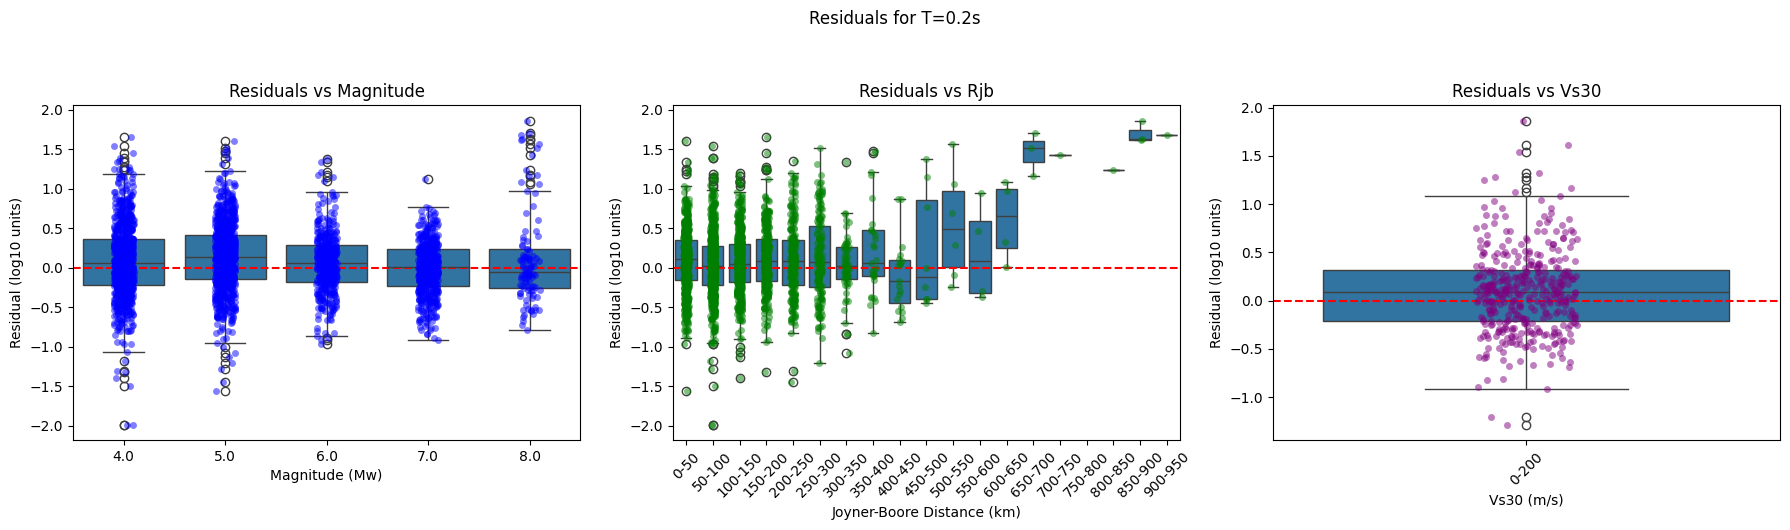

In [ ]:
X_test_original = scaler.inverse_transform(X_test_scaled[input_cols])
X_test_original = pd.DataFrame(X_test_original, columns=input_cols)
X_test_original['vs30'] = np.power(10, X_test_scaled['logvs30'])

# Extract the true values and predictions for the three periods
periods = ["t0", "t27", "t38"]
period_names = ['T=0.01s', 'T=0.1s', 'T=0.2s']

# Calculate residuals (log space)
mean_output = np.mean(outputs, axis=0)
residuals = true_values - mean_output[:, len(input_cols):]

# Create a dictionary to map column names to indices
target_idx = {col: idx for idx, col in enumerate(target_cols)}

# Plot residuals vs magnitude, distance, and Vs30 for each period
for period, period_name in zip(periods, period_names):
    # Get the index of the current period
    period_index = target_idx[period]

    # Create figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Residuals for {period_name}', y=1.05)

    # Residuals vs Magnitude
    sns.stripplot(x=np.round(X_test_original['mag']),
                  y=residuals[:, period_index],
                  ax=axes[0], marker='o', color='blue', alpha=0.5)
    sns.boxplot(x=np.round(X_test_original['mag']),
                y=residuals[:, period_index],
                ax=axes[0])
    axes[0].axhline(0, color='red', linestyle='--')
    axes[0].set_xlabel('Magnitude (Mw)')
    axes[0].set_ylabel('Residual (log10 units)')
    axes[0].set_title('Residuals vs Magnitude')

    # Residuals vs Joyner-Boore Distance
    # Bin the distances for better visualization
    rjb_bins = np.arange(0, X_test_original['rjb'].max()+50, 50)
    rjb_labels = [f"{int(b)}-{int(b)+50}" for b in rjb_bins[:-1]]
    binned_rjb = pd.cut(X_test_original['rjb'], bins=rjb_bins, labels=rjb_labels)

    sns.stripplot(x=binned_rjb,
                  y=residuals[:, period_index],
                  ax=axes[1], marker='o', color='green', alpha=0.5)
    sns.boxplot(x=binned_rjb,
                y=residuals[:, period_index],
                ax=axes[1])
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_xlabel('Joyner-Boore Distance (km)')
    axes[1].set_ylabel('Residual (log10 units)')
    axes[1].set_title('Residuals vs Rjb')
    axes[1].tick_params(axis='x', rotation=45)

    # Residuals vs Vs30
    # Bin Vs30 values for better visualization
    vs30_bins = np.arange(0, X_test_original['vs30'].max()+200, 200)
    vs30_labels = [f"{int(b)}-{int(b)+200}" for b in vs30_bins[:-1]]
    binned_vs30 = pd.cut(X_test_original['vs30'], bins=vs30_bins, labels=vs30_labels)

    sns.stripplot(x=binned_vs30,
                  y=residuals[:, period_index],
                  ax=axes[2], marker='o', color='purple', alpha=0.5)
    sns.boxplot(x=binned_vs30,
                y=residuals[:, period_index],
                ax=axes[2])
    axes[2].axhline(0, color='red', linestyle='--')
    axes[2].set_xlabel('Vs30 (m/s)')
    axes[2].set_ylabel('Residual (log10 units)')
    axes[2].set_title('Residuals vs Vs30')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

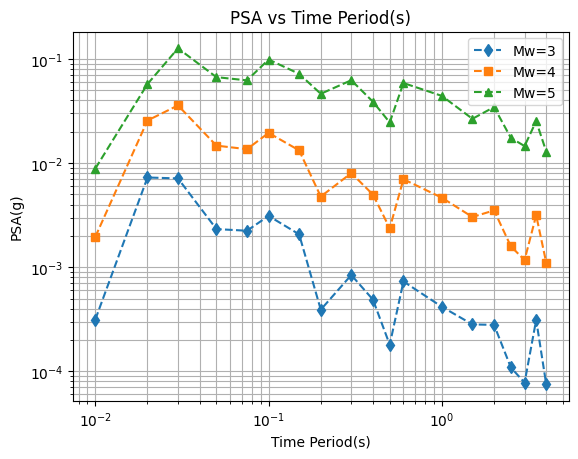

In [ ]:
PSA_tp = np.array([0.01, 0.02, 0.03, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 1.5, 2, 2.5, 3, 3.5, 4])

X_plot = pd.DataFrame(columns=['mag', 'hypd', 'rjb', 'logvs30','logrjb'])  # Conditional inputs, added logrjb to the columns
# Changed: Using rjb instead of logrjb and providing values for all columns
X_plot.loc[0] = [3, 10, 40, math.log10(10), math.log10(40)] # Added value for 'rjb' column
X_plot.loc[1] = [4, 10, 40, math.log10(10), math.log10(40)]  # Added value for 'rjb' column
X_plot.loc[2] = [5, 10, 40, math.log10(10), math.log10(40)]  # Added value for 'rjb' column


# Scale the inputs using the scaler
X_plot_scaled = scaler.transform(X_plot[['mag', 'hypd', 'rjb', 'logrjb', 'logvs30']]) # Selecting the correct columns for scaling

# Prepare a list to collect outputs
mean_output = []

# Generate predictions multiple times to get a mean output
for i in range(1000):
    output = predict(X_plot_scaled, generator) # Assuming your predict function is defined and takes scaled data
    # Inverse scale the predictions (assuming you have a scaler for outputs as well)
    #output = scaler.inverse_transform(output)
    mean_output.append(output)

# Calculate the mean and convert from log scale
mean_array = np.mean(mean_output, axis=0)

# Assuming output shape is (3, 25) for 3 magnitudes and 25 periods
# If you have a different output, adjust the slicing and plotting accordingly
# The generator outputs 33 values, but PSA_tp has 20. We need to select the correct indices.
# Assuming the first 5 values in the generator output are not PSA values:
plt.plot(PSA_tp, np.power(10, mean_array[0, 5:5+len(PSA_tp)]), linestyle='--', marker='d', label="Mw=3")
plt.plot(PSA_tp, np.power(10, mean_array[1, 5:5+len(PSA_tp)]), linestyle='--', marker='s', label="Mw=4")
plt.plot(PSA_tp, np.power(10, mean_array[2, 5:5+len(PSA_tp)]), linestyle='--', marker='^', label="Mw=5")


# Customize the plot
plt.grid(True, which="both")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc="upper right")
plt.title("PSA vs Time Period(s)")
plt.xlabel("Time Period(s)")
plt.ylabel("PSA(g)")
# Show the plot
plt.show()

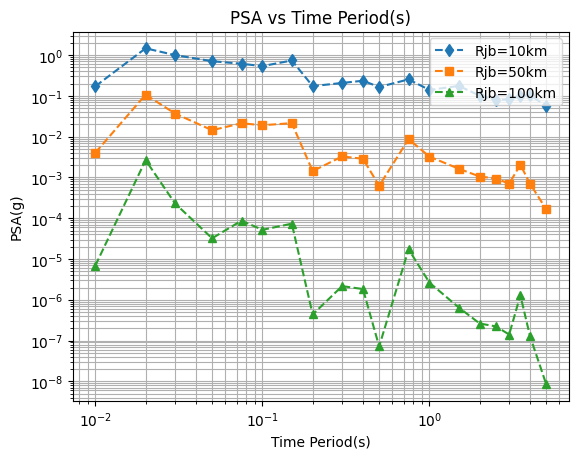

In [ ]:
PSA_tp = np.array([0.01, 0.02, 0.03, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5])

X_plot = pd.DataFrame(columns=['mag', 'hypd', 'rjb', 'logvs30', 'logrjb'])  # Conditional inputs
# Changed: Using rjb instead of logrjb
X_plot.loc[0] = [6.5, 10, 10, math.log10(760), math.log10(10)]
X_plot.loc[1] = [6.5, 50, 50, math.log10(760), math.log10(50)]
X_plot.loc[2] = [6.5, 100, 100, math.log10(760), math.log10(100)]

#Calculate logrjb after creating the DataFrame
X_plot['logrjb'] = np.log10(X_plot['rjb'])


# Scale the inputs using the scaler
X_plot_scaled = scaler.transform(X_plot[['mag', 'hypd', 'rjb', 'logrjb', 'logvs30']]) # Selecting the correct columns for scaling

# Prepare a list to collect outputs
mean_output = []

# Generate predictions multiple times to get a mean output
for i in range(1000):
    output = predict(X_plot_scaled, generator) # Assuming your predict function is defined and takes scaled data
    # Inverse scale the predictions (assuming you have a scaler for outputs as well)
    #output = scaler.inverse_transform(output)
    mean_output.append(output)

# Calculate the mean and convert from log scale
mean_array = np.mean(mean_output, axis=0)

plt.plot(PSA_tp, np.power(10, mean_array[0, 5:5+len(PSA_tp)]), linestyle='--', marker='d', label="Rjb=10km")
plt.plot(PSA_tp, np.power(10, mean_array[1, 5:5+len(PSA_tp)]), linestyle='--', marker='s', label="Rjb=50km")
plt.plot(PSA_tp, np.power(10, mean_array[2, 5:5+len(PSA_tp)]), linestyle='--', marker='^', label="Rjb=100km")


# Customize the plot
plt.grid(True, which="both")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc="upper right")
plt.title("PSA vs Time Period(s)")
plt.xlabel("Time Period(s)")
plt.ylabel("PSA(g)")
# Show the plot
plt.show()

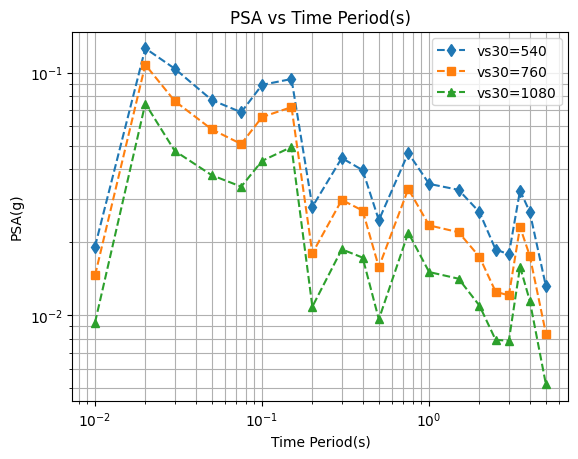

In [ ]:
PSA_tp = np.array([0.01, 0.02, 0.03, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5])

X_plot = pd.DataFrame(columns=['mag', 'hypd', 'rjb', 'logvs30', 'logrjb'])  # Conditional inputs
# Changed: Using rjb instead of logrjb
X_plot.loc[0] = [6.5, 10, 100, math.log10(540), math.log10(100)]
X_plot.loc[1] = [6.5, 10, 100,math.log10(760), math.log10(100)]
X_plot.loc[2] = [6.5, 10, 100, math.log10(1080), math.log10(100)]

#Calculate logrjb after creating the DataFrame
X_plot['logrjb'] = np.log10(X_plot['rjb'])


# Scale the inputs using the scaler
X_plot_scaled = scaler.transform(X_plot[['mag', 'hypd', 'rjb', 'logrjb', 'logvs30']]) # Selecting the correct columns for scaling

# Prepare a list to collect outputs
mean_output = []

# Generate predictions multiple times to get a mean output
for i in range(1000):
    output = predict(X_plot_scaled, generator) # Assuming your predict function is defined and takes scaled data
    # Inverse scale the predictions (assuming you have a scaler for outputs as well)
    #output = scaler.inverse_transform(output)
    mean_output.append(output)

# Calculate the mean and convert from log scale
mean_array = np.mean(mean_output, axis=0)

plt.plot(PSA_tp, np.power(10, mean_array[0, 5:5+len(PSA_tp)]), linestyle='--', marker='d', label="vs30=540")
plt.plot(PSA_tp, np.power(10, mean_array[1, 5:5+len(PSA_tp)]), linestyle='--', marker='s', label="vs30=760")
plt.plot(PSA_tp, np.power(10, mean_array[2, 5:5+len(PSA_tp)]), linestyle='--', marker='^', label="vs30=1080")


# Customize the plot
plt.grid(True, which="both")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc="upper right")
plt.title("PSA vs Time Period(s)")
plt.xlabel("Time Period(s)")
plt.ylabel("PSA(g)")
# Show the plot
plt.show()

In [ ]:
y_test = X_test[target_cols].to_numpy()
X_test_inputs = X_test[input_cols].to_numpy()